## Predict whether the customer will cancel his booking for a hotel or not

In this project I have trained a machine leaning model to see according to the set of data that we have if someone will camel his hotel booking or not.

I worked on the project to get more and more familiar with data scientist job and to make sure that I uderstant everthing that I have learned.

In this project I have divided the data into to datasets:
1. Train to train the machine learning models contains
2. Test to test the accuracy for the models contains

I applied several different supervised machine learning techniques to this data set:
* Logistic Regression
* Decision tree
* Random forest
* KNN

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/Users/abdulrahman/Documents/Datasets/hotel_bookings.csv')

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.sample(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
70844,City Hotel,1,233,2017,June,25,23,1,2,2,...,Non Refund,20.0,NaN,0,Transient,105.00,0,0,Canceled,2017-04-21
99621,City Hotel,0,261,2016,October,42,13,0,3,2,...,No Deposit,22.0,NaN,0,Transient-Party,90.95,0,2,Check-Out,2016-10-16
56512,City Hotel,1,426,2016,September,37,8,0,2,2,...,Non Refund,1.0,NaN,0,Transient,62.00,0,0,Canceled,2015-10-21
47423,City Hotel,1,38,2016,February,8,20,2,3,2,...,No Deposit,7.0,NaN,0,Transient,69.44,0,0,Canceled,2016-01-18
5107,Resort Hotel,1,185,2016,April,17,18,1,1,2,...,No Deposit,298.0,NaN,0,Transient-Party,85.00,0,0,Canceled,2016-04-08
93598,City Hotel,0,226,2016,July,30,22,0,2,1,...,No Deposit,1.0,NaN,96,Transient-Party,64.25,0,0,Check-Out,2016-07-24
85558,City Hotel,0,47,2016,March,12,14,1,3,2,...,No Deposit,9.0,NaN,0,Transient,77.35,0,1,Check-Out,2016-03-18
65148,City Hotel,1,166,2017,March,12,25,2,2,2,...,No Deposit,9.0,NaN,0,Transient,88.40,0,1,Canceled,2017-02-09
4620,Resort Hotel,1,77,2016,March,13,24,0,3,2,...,No Deposit,314.0,NaN,0,Transient,70.80,0,1,Canceled,2016-03-14
101229,City Hotel,0,13,2016,November,46,8,0,1,1,...,No Deposit,86.0,NaN,0,Transient,140.00,0,0,Check-Out,2016-11-09


In [7]:
df.shape

(119390, 32)

In [8]:
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Data Cleaning and preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [11]:
df.isna().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [12]:
df.drop('company', inplace=True, axis=1)

In [13]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [14]:
mean_value=df['agent'].mean()

In [15]:
df['agent'].fillna(value=mean_value, inplace=True)

In [16]:
df['agent'].fillna(value=mean_value, inplace=True)

In [17]:
df.isna().sum().sort_values(ascending=False)

children                          4
hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [18]:
df['children'].fillna(df['children'].mode()[0], inplace=True)

In [19]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_repeated_guest                 0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
distribution_channel              0
is_canceled                       0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month          

In [20]:
df.shape

(119390, 31)

### Converting categorical features

In [21]:
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [22]:
print(df['hotel'].unique())
print(df['arrival_date_month'].unique())
print(df['meal'].unique())
print(df['country'].unique())
print(df['market_segment'].unique())
print(df['distribution_channel'].unique())
print(df['reserved_room_type'].unique())
print(df['assigned_room_type'].unique())
print(df['deposit_type'].unique())

['Resort Hotel' 'City Hotel']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA' 'KHM'
 'MCO' 'BGD' 'IMN' 'T

In [23]:
print(df['customer_type'].unique())
print(df['reservation_status'].unique())
print(df['reservation_status_date'].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']
['Check-Out' 'Canceled' 'No-Show']
['2015-07-01' '2015-07-02' '2015-07-03' '2015-05-06' '2015-04-22'
 '2015-06-23' '2015-07-05' '2015-07-06' '2015-07-07' '2015-07-08'
 '2015-05-11' '2015-07-15' '2015-07-16' '2015-05-29' '2015-05-19'
 '2015-06-19' '2015-05-23' '2015-05-18' '2015-07-09' '2015-06-02'
 '2015-07-13' '2015-07-04' '2015-06-29' '2015-06-16' '2015-06-18'
 '2015-06-12' '2015-06-09' '2015-05-26' '2015-07-11' '2015-07-12'
 '2015-07-17' '2015-04-15' '2015-05-13' '2015-07-10' '2015-05-20'
 '2015-05-12' '2015-07-14' '2015-06-17' '2015-05-01' '2015-03-30'
 '2015-07-19' '2015-06-03' '2015-06-26' '2015-05-14' '2015-07-20'
 '2015-05-07' '2015-05-28' '2015-04-13' '2015-03-25' '2015-07-21'
 '2015-06-27' '2015-07-18' '2015-07-23' '2015-06-08' '2015-06-22'
 '2015-06-24' '2015-03-05' '2015-06-01' '2015-04-24' '2015-07-22'
 '2015-05-27' '2015-04-06' '2015-04-11' '2015-07-25' '2015-07-28'
 '2015-07-29' '2015-06-25' '2015-07-24' '2015-06-05' '20

In [24]:
df.drop(['lead_time', 'reservation_status_date'], inplace=True, axis=1)

In [25]:
pd.set_option('display.max_columns', None)
df

,hotel,is_canceled,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out
1,Resort Hotel,0,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.00,0,0,Check-Out
2,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.00,0,0,Check-Out
3,Resort Hotel,0,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out
4,Resort Hotel,0,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out
119386,City Hotel,0,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out
119387,City Hotel,0,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out
119388,City Hotel,0,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out


In [43]:
df['hotel'].replace('City Hotel',1, inplace=True, regex= True)
df['hotel'].replace('Resort Hotel',0, inplace=True, regex= True)

In [44]:
print(df['hotel'].unique())

[0 1]


In [56]:
df.replace({'arrival_date_month':{'July':7,'August':8,'September':9,'October':10,'November':11,'December':12,'January':1,'February':2,'March':3,'April':4,'May':5,'June':6}}, inplace=True, regex= True)

df.replace({'meal':{'BB':1,'FB':2,'HB':3,'SC':4,'Undefined':0}}, inplace=True, regex= True)

df.replace({'market_segment':{'Direct':1,'Corporate':2,'Online TA':3,'Offline TA/TO':4,'Complementary':5,'Groups':6,'Undefined':0,'Aviation':7}}, inplace=True, regex= True)

df.replace({'distribution_channel':{'Direct':1,'Corporate':2,'TA/TO':3,'Undefined':0,'GDS':4}}, inplace=True, regex= True)

df.replace({'reserved_room_type':{'C':3,'A':1,'D':4,'E':5,'G':7,'F':6,'H':8,'L':9,'P':10,'B':2}}, inplace=True, regex= True)

df.replace({'deposit_type':{'No Deposit':1,'Refundable':2,'Non Refund':3}}, inplace=True, regex= True)

df.replace({'customer_type':{'Transient':3,'Contract':1,'Transient-Party':4,'Group':5}}, inplace=True, regex= True)

## Data visualization

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

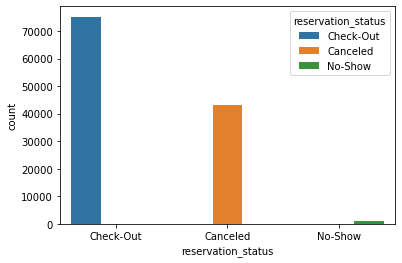

In [28]:
sns.countplot(x=df.reservation_status, data=df, hue='reservation_status')

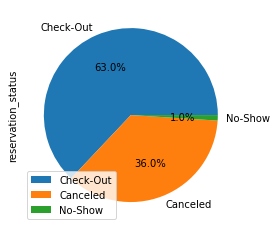

In [29]:
df['reservation_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.legend(loc=3)

## Building the models

### Traine and test split for data

In [57]:
features = list(df[['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','market_segment','distribution_channel','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','reserved_room_type','booking_changes','deposit_type','agent','days_in_waiting_list','customer_type','adr','required_car_parking_spaces','total_of_special_requests']])
features

['hotel',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [58]:
y= df['is_canceled']
x= df[features]

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.25,random_state=2)

In [60]:
xtrain.shape

(89542, 24)

In [61]:
ytrain.shape

(89542,)

In [62]:
xtest.shape

(29848, 24)

In [63]:
ytest.shape

(29848,)

In [64]:
print("Train Size: ", len(xtrain))
print("Test Size:  ", len(xtest))

Train Size:  89542
Test Size:   29848


### Model training and predicting

### Logistic regression

In [68]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(max_iter=130000)
LR= LR.fit(xtrain , ytrain) 

In [69]:
ypred = LR.predict(xtest)

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[18185,   779],
       [ 5538,  5346]])

In [71]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     18964
           1       0.87      0.49      0.63     10884

    accuracy                           0.79     29848
   macro avg       0.82      0.73      0.74     29848
weighted avg       0.81      0.79      0.77     29848



### Decision tree

In [72]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=2)
clf = clf.fit(xtrain,ytrain)

In [73]:
ypred = clf.predict(xtest)

In [74]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[16212,  2752],
       [ 2805,  8079]])

In [75]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     18964
           1       0.75      0.74      0.74     10884

    accuracy                           0.81     29848
   macro avg       0.80      0.80      0.80     29848
weighted avg       0.81      0.81      0.81     29848



### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier(n_estimators=4)
clf2= clf2.fit(xtrain , ytrain)

In [77]:
ypred = clf2.predict(xtest)

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[17569,  1395],
       [ 3443,  7441]])

In [79]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     18964
           1       0.84      0.68      0.75     10884

    accuracy                           0.84     29848
   macro avg       0.84      0.81      0.82     29848
weighted avg       0.84      0.84      0.83     29848



### KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [82]:
ypred = knn.predict(xtest)

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[16288,  2676],
       [ 4077,  6807]])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83     18964
           1       0.72      0.63      0.67     10884

    accuracy                           0.77     29848
   macro avg       0.76      0.74      0.75     29848
weighted avg       0.77      0.77      0.77     29848

